# Exploring Soccer players in FIFA - 20 

In [422]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from __future__ import division
from pandas import DataFrame

#from matplotlib.font_manager import FontManager
#import matplotlib.patches as patches
#import matplotlib.colors as col

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

# Business Understanding

I am a huge fan of Soccer. So, In this notebook I am using data science to answer three questions involving players in fifa 20 game

The FIFA game mirrors the real world attributes of Soccer players. Their real wages are recorded here and also an approximate value of a player is also recorded. The skill points given to a player almost match how they play in real life

So from a team management point of view, I would like to see the following three questions answered by data science

* Which type of players costs more money for a team (Value) ? and which type of players earn the most (Wage)?
* What are top 5 correlating features to decide value and wage of a player ?
* How are skills distributed among different category of players (Forward, Midfield and Defense) ?

# Understanding Data

In [423]:
#import data and setting visibility to maximum
players_df = pd.read_csv('Downloads/players_20.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
players_df.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [424]:
# Displaying the number of rows and columns
players_df.shape

(18278, 104)

In [426]:
# Displaying the data type of each column
players_df.dtypes

sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags                    object
team_position                  object
team_jersey_number            float64
loaned_from 

# Data Preparation

We are going to remove the goal keepers from the dataset since their values are usually lower and they have negligible numbers in most pof the other skills. Removing them will remove null data in most columns that are applicable for outfield players. Also adding them will skew the data science we are about to do

Data preparation steps we are about to do here are
* Remove Goal keepers from Dataset
* Remove columns with more null data
* Remove other unnecessary columns like player face, id, long name and url
* Replace NaNs with 0's
* There are some columns in which there is multiple data, split them into separate columns
* Remove columns with goalkeeping attributes and skills (Since they are null for outfield players) 

In [427]:
# Remove Goal Keepers from the dataset
remove_gk = players_df[players_df["player_positions"]=='GK'].index
outfield_df = players_df.drop(remove_gk)

In [428]:
# Remove goalkeeping attributes (since they are null for outfield players)
outfield_df = outfield_df.loc[:, ~outfield_df.columns.str.startswith('goalkeeping')]

### position 
* Most of the players are capable of playing multipl positions. But they play in one position regularly for their club and their attributes are most suited for that role. 
* For example Lionel Messi's player positions are RW,CF,ST. But he plays in RW almost everytime so his attributes correlate for a right winger
* So we split the column and drop the second and third playing position and keep only the primary position for analysis

### workrate
* Similarly workrate of a player is divided into two categories - attack and defense. In the dataset it is presented in one column. We split and keep the work rate data in two different columns

In [429]:
outfield_df[['position','p_2','p_3']] = outfield_df['player_positions'].str.split(',',expand=True)
outfield_df['attack_workrate'] = outfield_df['work_rate'].map(lambda x: x.split('/')[0])
outfield_df['defense_workrate'] = outfield_df['work_rate'].map(lambda x: x.split('/')[1])

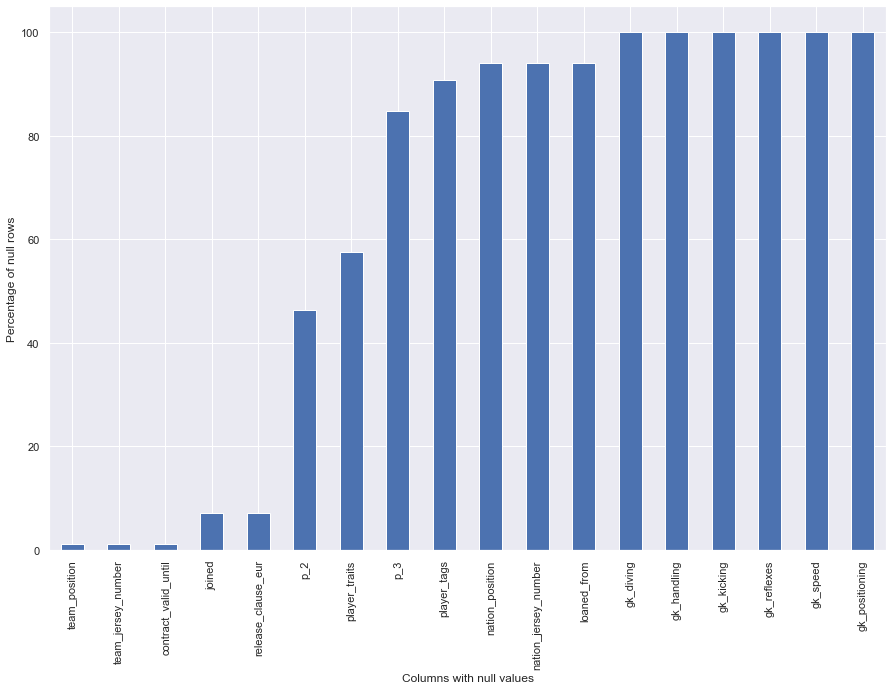

In [430]:
#Handle Columns with more null values
columns_with_null = outfield_df.isnull().sum()
columns_with_null = columns_with_null[columns_with_null > 0]/(outfield_df.shape[0]) * 100
columns_with_null.sort_values(inplace=True)
columns_with_null.plot.bar(figsize=(15,10))
plt.xlabel('Columns with null values')
plt.ylabel('Percentage of null rows')
plt.show()

In [431]:
# Remove Columns that has more than 50% of the rows with null values
more_than_50_null = [col for col in outfield_df.columns if (outfield_df[col].isnull().sum()/outfield_df.shape[0]) * 100 > 50]
for col in more_than_50_null:
    outfield_df.drop(col, axis=1, inplace=True)

#### Remove other Unnecessary rows
* The rows of object data type at the end  like cb,rb,rs,ls shows how one player is capable in all possible positions. This is not a necessary data since we only want to know the player's overall ability and his specific skill sets, not his ability to be versatile. (No need to know how good a forward will fare as a defender)
* attributes like team_position (Duplicate of player position), real_face, dob, long_name and url
* Also remove second and third position along with work rate column since we have new relevant columns for those data needed for the analysis 

In [432]:
other_col_dropped = ['ls','rs','lf','rf','cf','st','lw','rw','lam','cam','ram','lm','cm','rm','lcm','rcm','ldm','rdm','cdm','lwb','rwb','lb','rb','lcb','rcb','cb','dob','long_name','sofifa_id','player_url','team_position','player_positions','p_2','real_face','work_rate','joined','contract_valid_until','release_clause_eur','team_jersey_number']
for col in other_col_dropped:
    outfield_df.drop(col, axis=1, inplace=True)

In [433]:
# Replace NaNs with 0's
outfield_df.fillna(0, inplace=True)

In [456]:
processed_outfield_df = outfield_df.reset_index(drop=True)

In [457]:
processed_outfield_df.shape

(16242, 57)

In [458]:
processed_outfield_df.head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,position,attack_workrate,defense_workrate
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Messi,195800000.0,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,RW,Medium,Low
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,C. Ronaldo,96500000.0,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,ST,High,Low
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,Neymar,195200000.0,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,LW,High,Medium
3,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,Normal,184500000.0,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,LW,High,Medium
4,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,Normal,166500000.0,17.0,2015-08-30,2023.0,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,CAM,High,High
5,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,200000,Right,3,3,2,Normal,150200000.0,4.0,2018-01-01,2023.0,77.0,60.0,70.0,71.0,90.0,86.0,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,CB,Medium,Medium
6,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,340000,Right,4,4,4,Lean,92300000.0,10.0,2012-08-01,2020.0,74.0,76.0,89.0,89.0,72.0,66.0,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,CM,High,High
7,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,240000,Left,3,3,4,PLAYER_BODY_TYPE_25,148900000.0,11.0,2017-07-01,2023.0,93.0,86.0,81.0,89.0,45.0,74.0,79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,RW,High,Medium
8,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,Right,3,4,5,Normal,191700000.0,7.0,2018-07-01,2022.0,96.0,84.0,78.0,90.0,39.0,75.0,78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32,ST,High,Low
9,K. Koulibaly,28,187,89,Senegal,Napoli,89,91,67500000,150000,Right,3,3,2,Normal,119800000.0,26.0,2014-07-01,2021.0,71.0,28.0,54.0,67.0,89.0,87.0,30,22,83,71,14,69,28,28,63,71,69,73,52,86,41,55,81,73,95,15,87,88,35,52,33,82,91,90,87,CB,Medium,High


Now, We have processed the data for the analysis. Although there will be some more minor preparations to the data depending on the machine learning task.

# Question 1

Which type of players costs more money for a team (Value) ? and which type of players earn the most (Wage)?

In [437]:
# Group the dataset by Position and create two such datasets for sum and count
position_sum = processed_outfield_df.groupby('position').sum()
position_count = processed_outfield_df.groupby('position').count()

In [438]:
# Formulae for value per position and wage per position
position_sum['number_of_players'] = position_count['short_name']
position_sum['value_per_position'] = position_sum['value_eur'] / position_sum['number_of_players']
position_sum['wage_per_position'] = position_sum['wage_eur'] / position_sum['number_of_players']

In [439]:
position_sum.head(15)

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,number_of_players,value_per_position,wage_per_position
position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CAM,28167,202367,80817,76667,83686,3885745000,12195000,1292,3692,3414,6.939207e+09,23513.0,2277869.0,79875.0,68890.0,73717.0,78988.0,47050.0,64872.0,68755,67743,55470,77543,63411,78440,70842,66885,71763,78558,80814,79113,83890,71067,84649,73151,68240,71754,63715,68488,58165,44380,71064,75717,66502,72531,46156,47402,45013,1146,3.390702e+06,10641.361257
CB,81734,589403,252072,210812,226586,7431260000,29387000,3477,8792,6407,1.335816e+10,53202.0,6301800.0,181774.0,113411.0,151217.0,156351.0,208115.0,224060.0,127830,96510,207431,181628,101272,140808,114162,107755,164553,169557,178529,184330,167328,192590,172769,156389,223748,202506,239802,107587,211300,204221,110733,131180,130606,184946,205550,213526,206275,3162,2.350177e+06,9293.801392
CDM,36854,257439,106615,95965,102760,3642080000,13863000,1575,4239,3350,6.518538e+09,26615.0,2821514.0,87748.0,72600.0,87077.0,89378.0,92415.0,100041.0,74881,64860,83050,97290,62901,86171,71726,68643,92612,92916,88135,87411,91243,91643,93304,88458,95298,103027,99156,76160,99538,93723,74253,85578,72103,88847,92094,95236,91035,1424,2.557640e+06,9735.252809
CF,2874,20101,8141,7812,8342,889480000,3237000,157,378,353,1.649598e+09,2173.0,226406.0,8263.0,7495.0,7200.0,8105.0,4085.0,6862.0,6682,7645,6326,7661,6973,8102,7064,6344,6606,8055,8361,8182,8475,7568,8229,7592,7222,7438,6875,7242,6008,3830,7744,7572,6978,7446,4009,3828,3358,113,7.871504e+06,28646.017699
CM,53941,392188,159099,144185,157603,5993780000,22289000,2440,6774,5813,1.057951e+10,44513.0,4395889.0,143061.0,123420.0,140177.0,144999.0,125526.0,141539.0,125363,115775,115550,151208,109320,142033,125064,118246,144362,147294,144243,142051,150762,139176,153979,139463,138334,153159,137985,127624,136434,127178,130275,141612,117590,137287,123603,130293,122738,2193,2.733142e+06,10163.702690
LB,32820,232583,94545,85589,92139,2318615000,10631000,1387,3639,3159,4.165205e+09,24737.0,2599125.0,94456.0,58660.0,75505.0,82518.0,81627.0,85472.0,83224,52729,71993,80221,51295,81020,69218,59693,71715,81546,94377,94543,89568,81001,90343,69755,87468,92819,82899,59209,82038,81484,71113,67721,59846,75551,80610,84994,83854,1303,1.779444e+06,8158.864160
LM,25895,185197,74216,69716,75165,2528575000,8979000,1132,3298,3097,4.387928e+09,22576.0,2097908.0,80205.0,62596.0,64398.0,72112.0,40618.0,60727.0,66021,62389,50574,66994,55667,72007,62148,55106,60338,70240,80699,79835,79318,63458,77958,67038,64118,68732,60041,60506,51493,38091,65001,64017,58660,62904,40871,39591,37604,1049,2.410462e+06,8559.580553
LW,8884,66668,26705,25306,27822,1514915000,5306000,432,1207,1171,2.683079e+09,8895.0,757991.0,29385.0,23449.0,22925.0,26646.0,12937.0,21172.0,23612,23599,18294,23925,21183,26751,22650,19259,20632,25969,29711,29119,29124,22996,28372,25037,22459,23702,21039,22350,17991,11597,23807,23143,21910,23187,13200,12223,11463,378,4.007712e+06,14037.037037
LWB,2286,16048,6548,5834,6266,149905000,707000,94,246,224,2.604140e+08,1593.0,179883.0,6638.0,4166.0,5174.0,5713.0,5414.0,5902.0,5690,3870,4693,5466,3685,5600,4818,4164,4875,5619,6657,6618,6364,5459,6289,4867,5977,6539,5674,4110,5652,5406,4899,4672,4055,5164,5409,

In [440]:
# Function to visualize in descensing order
def visualize_by_position (xyz):
    position_sum.sort_values(xyz +'_per_position', ascending=False, inplace=True)
    position_sum[xyz +'_per_position'].plot(kind='bar',color=np.random.rand(4))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.title("{} of a player by position.".format(xyz))
    print("{} of a player by position.".format(xyz))

In [441]:
# Assign v for value and w for wage
v = 'value'
w = 'wage'

value of a player by position.


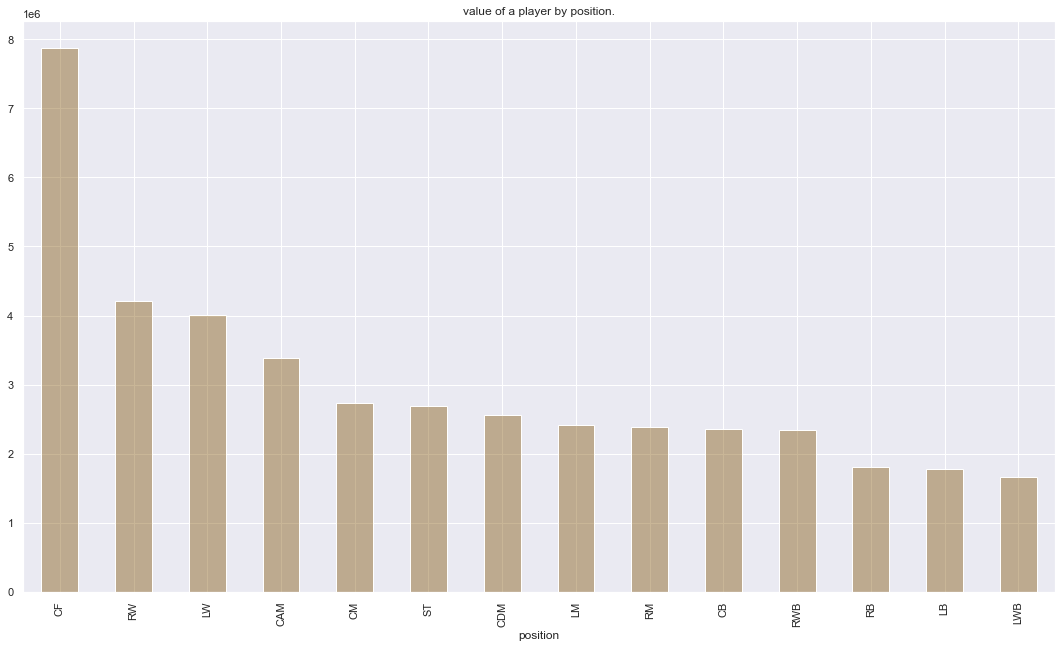

In [442]:
# Value of a player by position
visualize_by_position(v)

wage of a player by position.


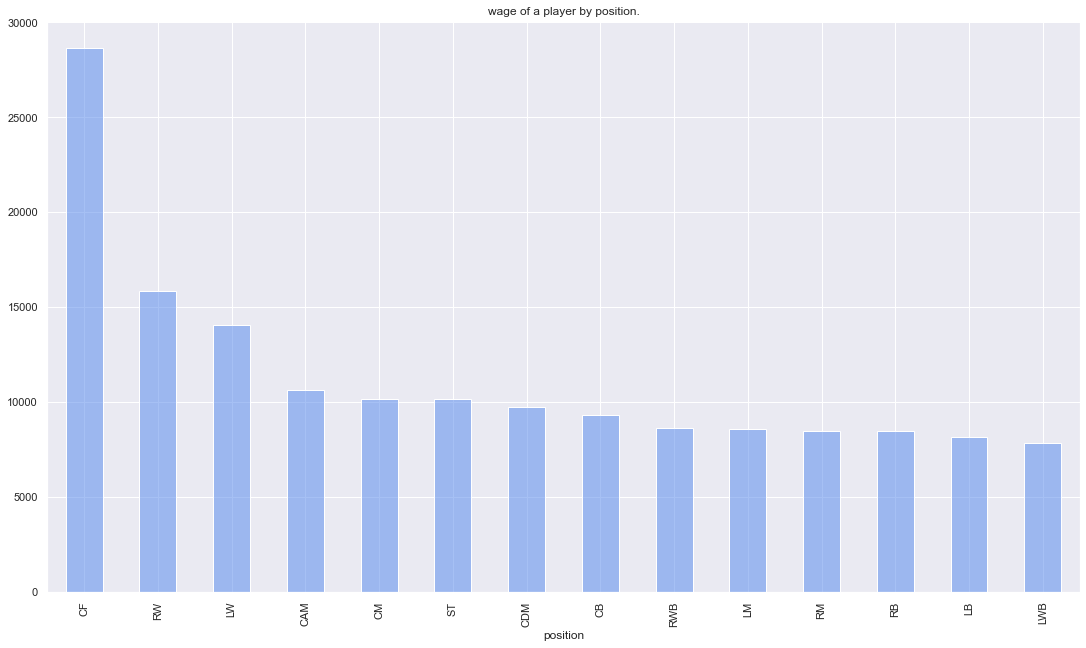

In [444]:
#wage of a player by position 
visualize_by_position(w)

### Observations
* Value of a player from a specific position is proportional to the wages they earn except center backs earn slightly better than how much is spent on them
* Center Forwards are the most expensive players to acquire (value) and maintain(wage). They almost cost twice as the second most expensive position and earn almost twice as the next best earner
* In general forwards earn better than midfielders and defenders
* Defenders, especially full backs earn less than all other positions and also cost very less for the teams

Question 2

What are the top 5 features that decides value and wage of a player ?

In [465]:
players_feature_df = outfield_df.reset_index(drop=True)

In [466]:
# Removing some more columns that are not necessary for the analysis
unnecessary_columns = ['short_name', 'age', 'club','nationality','potential','overall']
for col in unnecessary_columns:
    players_feature_df.drop(col, axis=1, inplace=True)

Reason for removing Overall, age and club is because
* Overall - Players with good overall have good wages and value so it will skew the analysis
* Age - Players who are very old or very young don't have good value
* Club - The players playing for big clubs get hefty wages regardless of ability. This will again skew the analysis

In [467]:
# One Hot encoding these 5 categorical columns
one_hot_columns = ['position', 'attack_workrate', 'defense_workrate','preferred_foot','body_type']
players_feature_df = pd.get_dummies(players_feature_df, columns=one_hot_columns, prefix = one_hot_columns)

In [468]:
players_feature_df.shape

(16242, 73)

In [469]:
# Setting two different target variables - Value and Wage
y1 = players_feature_df['wage_eur']
y2 = players_feature_df['value_eur']
X = players_feature_df.drop(['value_eur', 'wage_eur'], axis=1)

In [492]:
# Traininng using a Random Forest Regressor , Showing the accuracy and displaying the top 5 features
def model_train(y) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    RFR = RandomForestRegressor(n_estimators=500)
    RFR.fit(X_train, y_train)
    y_test_preds = RFR.predict(X_test)
    print(r2_score(y_test, y_test_preds))
    coefficients_df = pd.DataFrame()
    coefficients_df['Features'] = X_train.columns
    coefficients_df['Coefficients'] = RFR.feature_importances_
    coefficients_df.sort_values('Coefficients', ascending=False).head(5)
    coefficients_df.set_index('Features', inplace=True)
    coefficients_df.sort_values('Coefficients', ascending=False).head(5).plot(kind='bar', color= 'blue' )

0.7636865024895105


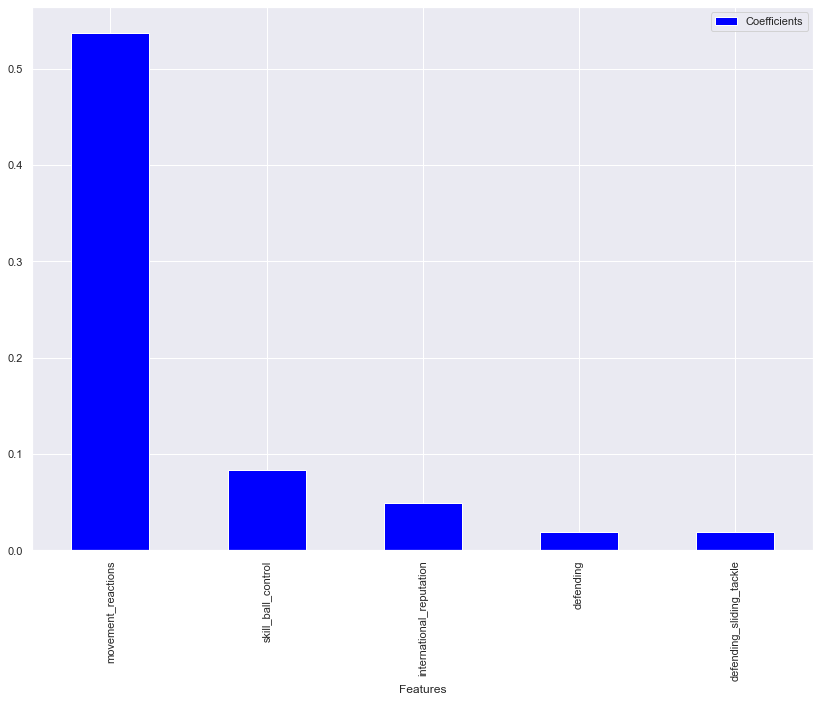

In [493]:
model_train(y1)

 ### Observation - Important features for wage
 #####  For a player to get good wages he must have
 * Good reactions
 * Good ball control
 * High International reputation 
 * Has good sliding tackle capability
 * Has good overall defending skills

0.8731659940410103


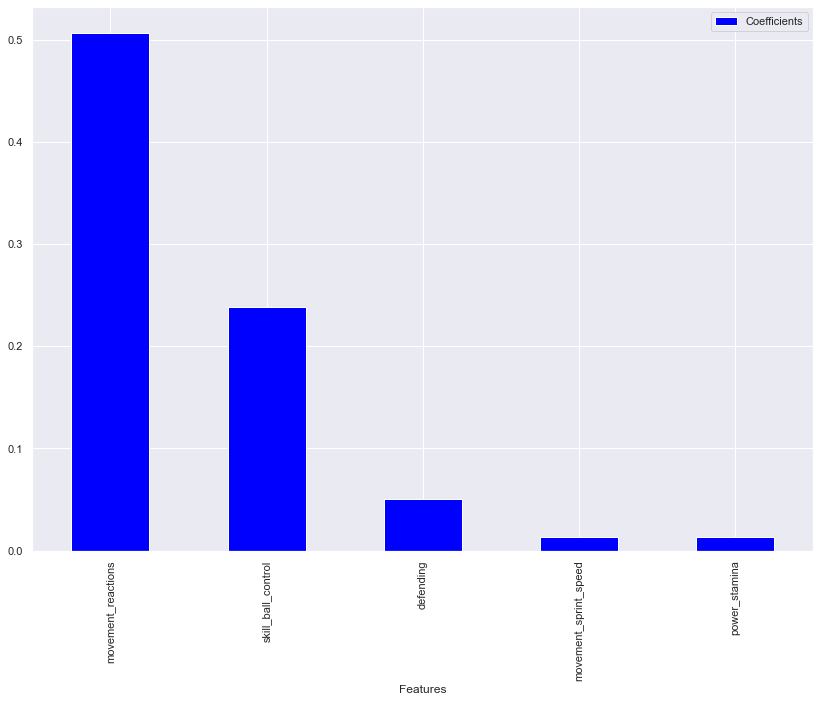

In [494]:
model_train(y2)

### Observation - Important features for value
 #####  For a player to be valuable he must have
 * Good reactions
 * Good ball control
 * Has good overall defending skills
 * Has good sliding tackle capability
 * Has good sprint speed


# Question_3


How are skills distributed among different category of players (Forward, Midfield and Defense) ?

In [477]:
players_attributes_df = processed_outfield_df.reset_index(drop=True)

In [478]:
# Preparing Data for the Seaborn Heatmap
# Drop the column 'skill_moves' since it does not reflect the skill attributes of a player
players_attributes_df.drop('skill_moves', axis=1, inplace=True)

#Group the players into more generalized category of positions
dict_pos = {
    'ST': 'Forward - Center',
    'CF': 'Forward - Center',
    'LW': 'Forward - Wide',
    'RW': 'Forward - Wide',
    'CM': 'Midfielder - Central',
    'CAM': 'Midfielder - Attacking ',
    'CDM': 'Midfielder - Defensive',
    'LM': 'Midfielder - Wide',
    'RM': 'Midfielder - Wide',
    'CB': 'Defense - Center',
    'LB': 'Defense - Full Back',
    'RB': 'Defense - Full Back',
    'LWB': 'Defense - Wing Back',
    'RWB': 'Defense - Wing Back',
}

players_attributes_df['position_category'] = players_attributes_df['position'].map(dict_pos)


In [490]:
#Function to plot all the attributes in a seaborn heatmap
def attribute_importance(x):
    if x == 'basic' :
        cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
    else:
            cols = [col for col in players_attributes_df if col.startswith(x)]
            
    for col in cols:
        players_attributes_df.loc[:,'n_' + col] = players_attributes_df[col]/ players_attributes_df['overall']
    req_col_att = [ 'n_' + col for col in cols]
    skills_analysis_df = players_attributes_df[req_col_att + ['position_category']]
    tmp = skills_analysis_df.groupby('position_category').mean()
    sns.set(rc={'figure.figsize':(14,10)})
    sns.heatmap(tmp,cmap = 'viridis_r' ,annot=True)

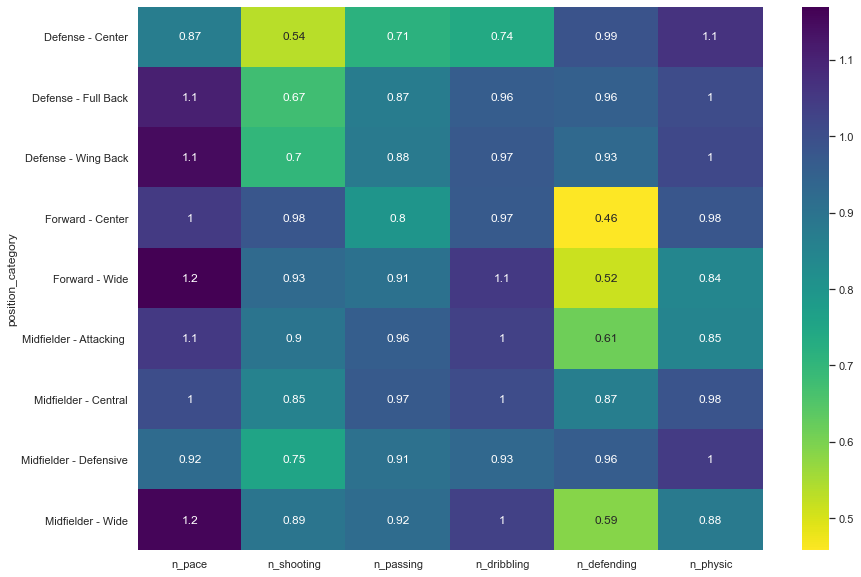

In [491]:
# Importance of all basic skills by category
attribute_importance('basic')

#### Basic Skills
* Pace is an important skill for all players except Center backs and defensive midfielders. Even the full backs and wing backs rely more on pace than the strikers. Wide players are the fastest players overall
* shooting skills are important forwards, followed by wide and attacking midfielders. The center backs have a very poor shooting skill
* Almost everyone's passing skills are more or less the same with center backs not as good as the others
* Again for dribbling center backs are the poorest in this. forwards and wide players have good dribbling abilities
* As expected for defending the center backs are the best followed by the full backs. the defensive midfielders are more adept in this than the wing backs
* physical attributes are amost same for all categories but the center backs are better than others and wide mids and forwards along with the attacking mid are lacking in this area 

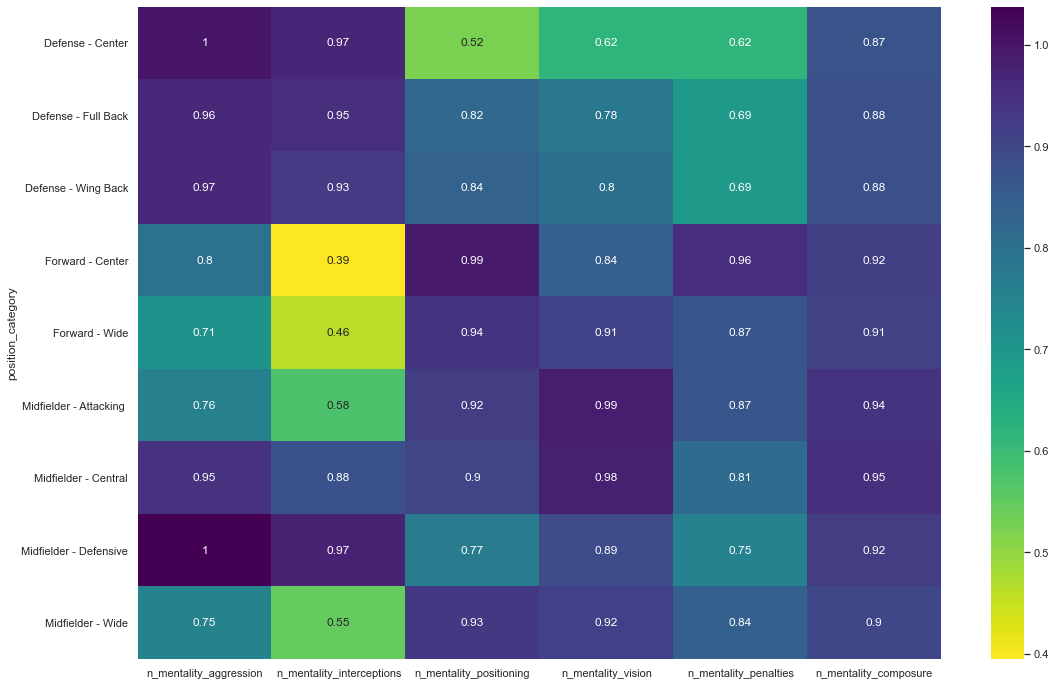

In [410]:
# Importance of all basic skills by category
attribute_importance('skills')

#### Mentality
* Defensive players have good aggression and it redices as it goes to the top. The center forwards have slightly better aggression than the rest of the attack minded players
* Again the defensive players have good interception skills. Forwards and wide midfielders are lacking in this area
* The center forward is best when it comes to positioning followed by other attacking players. The center backs are very poor in this
* It's the midfielders who are masters in this followed by the forwards and then the defenders
* The center forwards are good in penalties mostly
* The midfielders have the best composure but even the others are not far behind

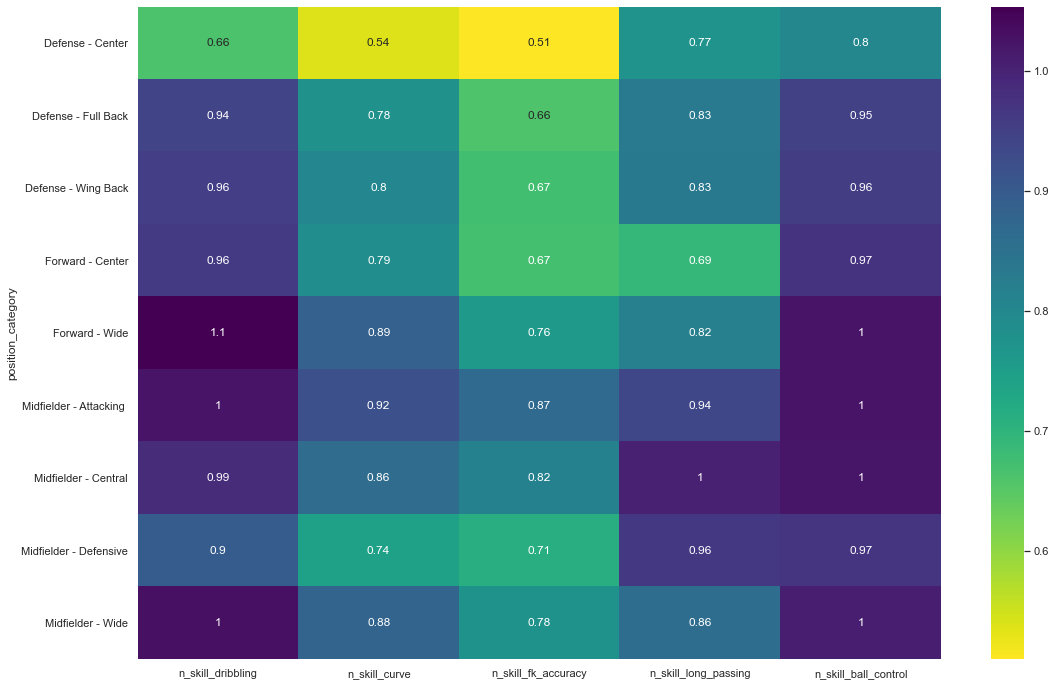

In [481]:
# Importance of all basic skills by category
attribute_importance('skill')

#### Skill
* Wide Forwards and midfielders are good dribblers while center backs are poorest in this
* Forwards have the skill-curve better than others 
* Usually the attacking midfielders have the best free kick accuracy
* Midfielders have the best long passing capacity
* Except the center backs almost everyone have similar and excellent ball control

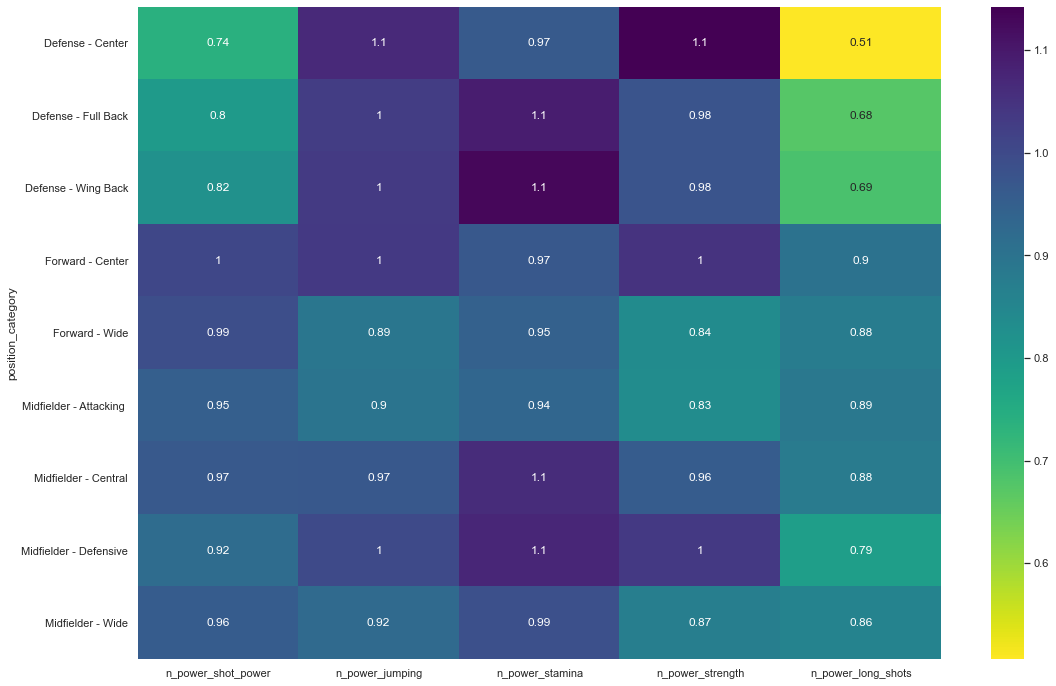

In [412]:
# Importance of all basic skills by category
attribute_importance('power')

#### Power
* The forwards have the best shot power followed by mids and then the defenders
* The center backs are best in jumping with others akmost having the same except wide forwards, wide mids and attacking mids who are a little behind others
* Central midfielders and wide defenders are the players with best stamina. Attacking midfielders are behind the rest
* Center backs are the strongest players and the attacking mids are the weakest ones
* Forwards have best long shooting capabilities while defenders are bad in this

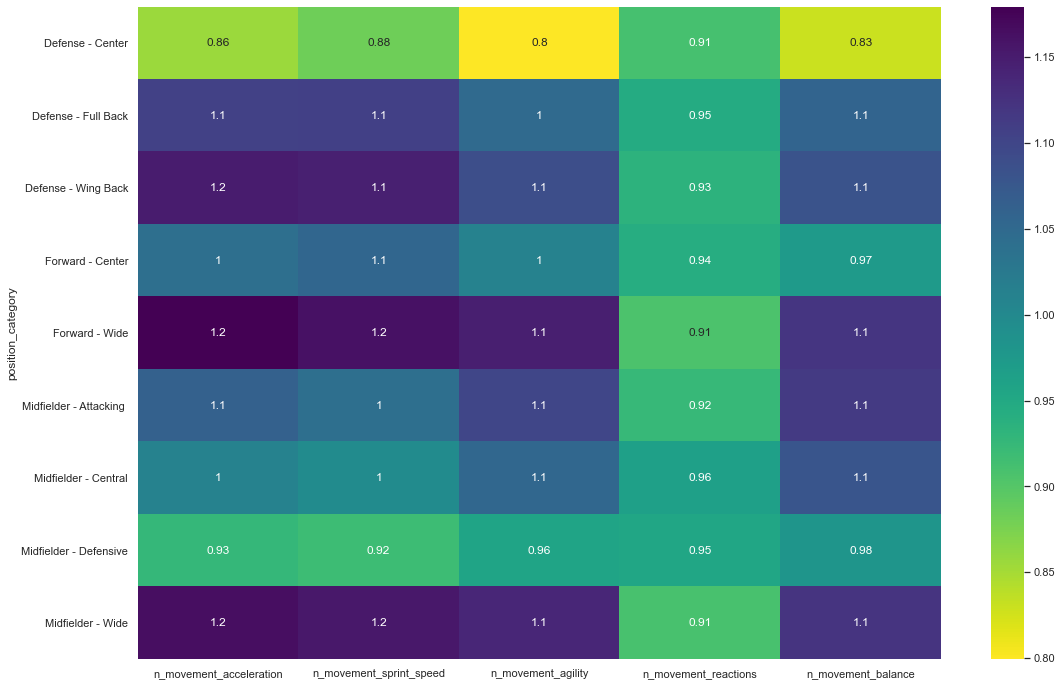

In [413]:
# Importance of all basic skills by category
attribute_importance('movement')

#### Movement
* Wide players are fastest players while center backs are slowest
* Agility is almost same for all players except for center backs
* Reactions is an important attribute and every type of player has similar reaction
*  Again the balance is same for almost all categories except the center back who are far behind in this